## Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

### DOMAIN ANALYSIS
Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.

Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.

Source: This column holds the name of the place from where the passenger’s journey will start.

Destination: This column holds the name of the place to where passengers wanted to travel.

Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

Arrival_Time: Arrival time is when the passenger will reach his/her destination.

Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.

Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.

Additional_Info: In this column, we will get information about food, kind of food, and other amenities.

Price: Price of the flight for a complete journey including all the expenses before onboarding.

In [4]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_excel('Flight_Fare.xlsx')

### BASIC CHECKS

In [6]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df.shape

(10683, 11)

### DATA VISUALIZATION

In [12]:
import sweetviz as sv
my_report= sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


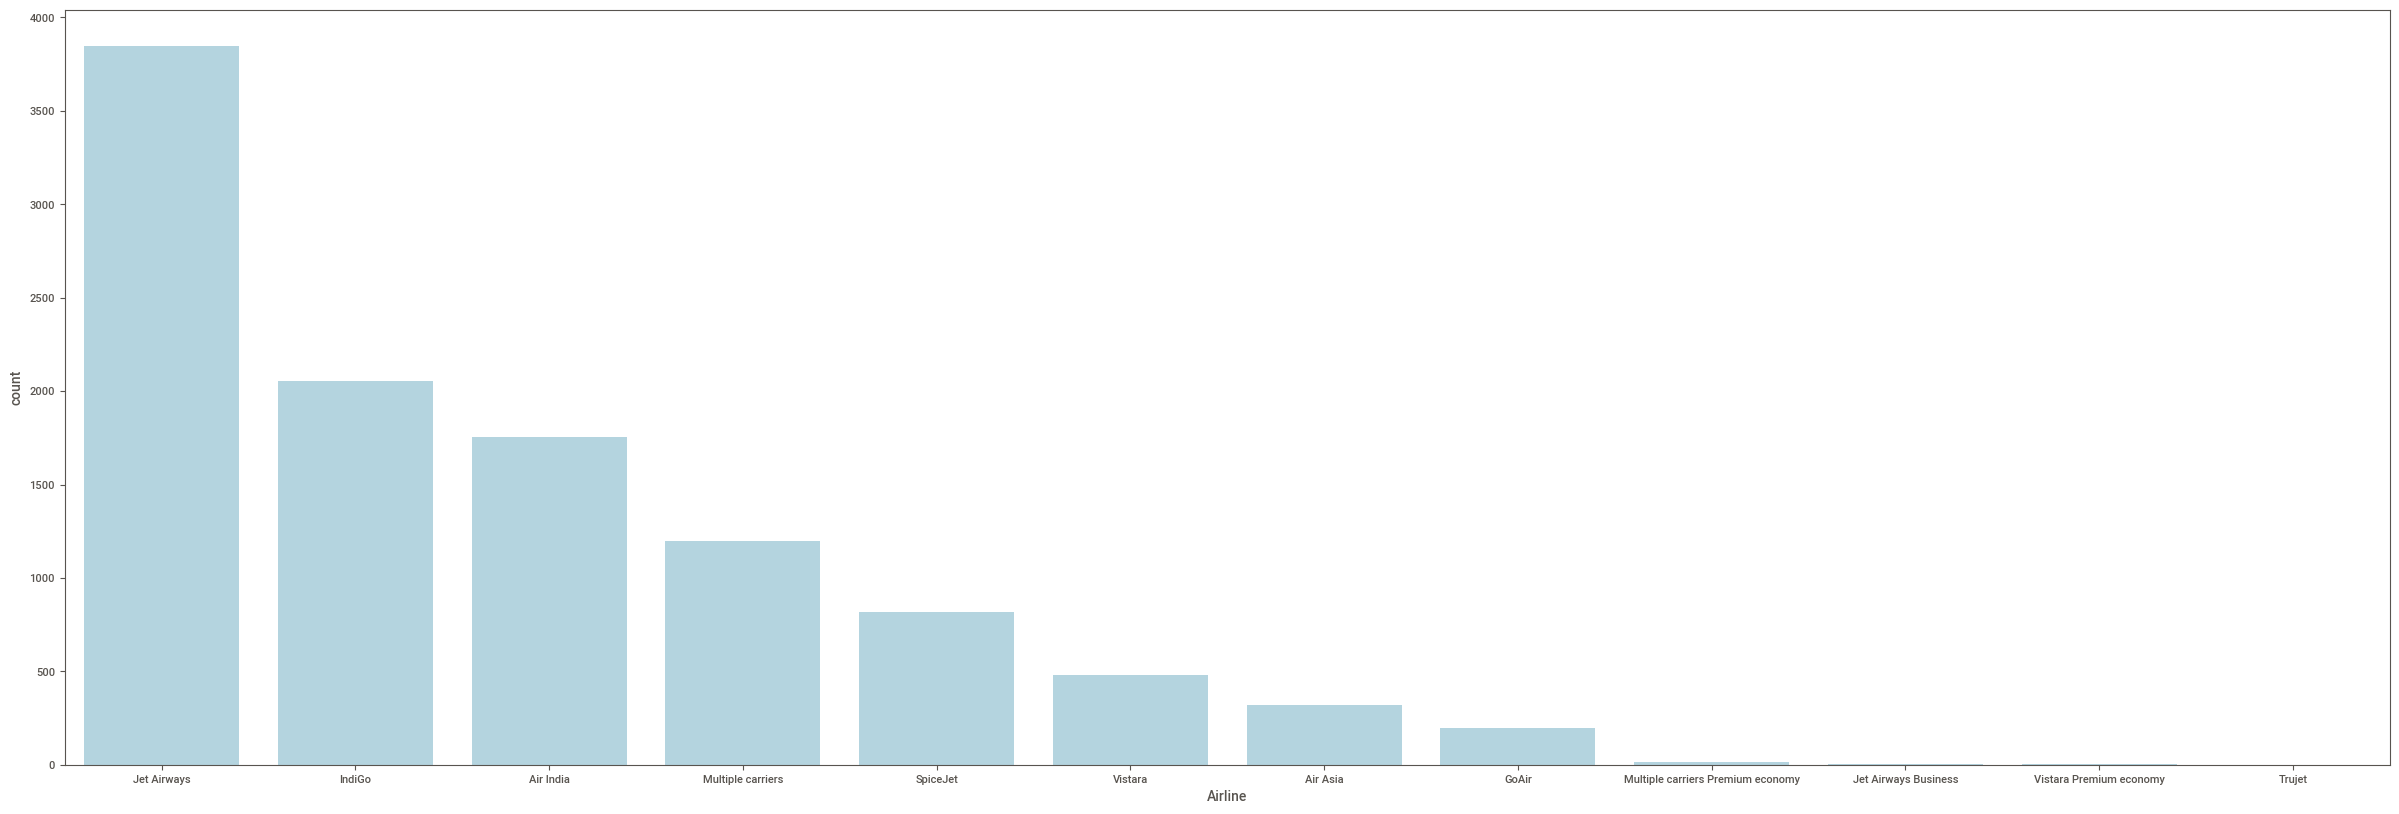

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(data=df,x=df['Airline'],color='LightBlue',order=df['Airline'].value_counts().index)
plt.show()

### DATA PREPROCESSING

In [14]:
#Date_of_Journey
df["Day_of_ Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["month_of_Journey"] = pd.to_datetime (df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(['Date_of_Journey'],axis= 1,inplace= True)
df.head ()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
#Dep_Time
df['Dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']= pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis= 1,inplace= True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
#Arrival_Time
df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']= pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis= 1,inplace= True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
#Duration
duration= list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]

duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [18]:
df['Duration_hour']= duration_hour
df['duration_min']= duration_min
df.drop(['Duration'],axis= 1,inplace= True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [19]:
#Airline
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [20]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
#Source
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [22]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
#Destination
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
#Route,Additional_Info
df.drop(['Route','Additional_Info'],axis= 1,inplace= True)

In [26]:
#Total_Stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [28]:
#df.drop(['Airline','Source','Destination'],axis=1)
data = pd.concat([df,Airline,Source,Destination],axis=1)
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data

,Total_Stops,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


### CLEANING THE DATA

In [29]:
##check missing values
data.isnull().sum()

Total_Stops                                  1
Price                                        0
Day_of_ Journey                              0
month_of_Journey                             0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hour                                0
duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [30]:
data['Total_Stops'].isnull().sum()

1

In [31]:
data.dropna(inplace=True)

In [32]:
data.isnull().sum()

Total_Stops                                  0
Price                                        0
Day_of_ Journey                              0
month_of_Journey                             0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hour                                0
duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

### CHECKING FOR OUTLIERS

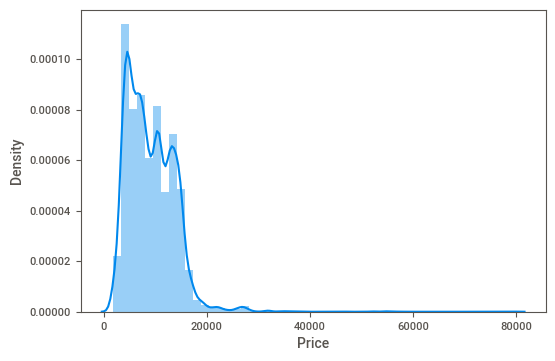

In [33]:
sns.distplot(data['Price'])
plt.show()

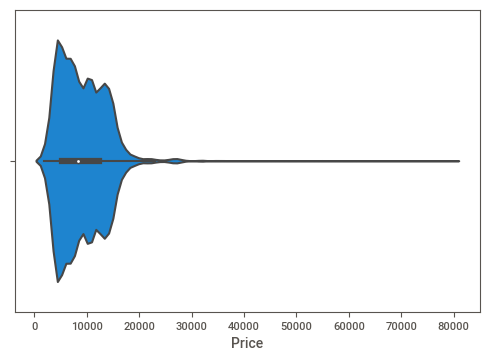

In [34]:
sns.violinplot(data['Price'])
plt.show()

In [35]:
Q1= data['Price'].quantile(0.25)
Q3= data['Price'].quantile(0.75)
IQR= Q3 - Q1

In [36]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
trimmed_data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

In [38]:
trimmed_data

,Total_Stops,Price,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [39]:
outliers = trimmed_data[(trimmed_data['Price'] < lower_bound) | (trimmed_data["Price"] > upper_bound)]

In [40]:
if outliers.empty:
    print("No outliers remaining in the column.")
else:
    print("Outliers still present in the column:")
    print(outliers)

No outliers remaining in the column.


### CHECKING FOR DUPLICATE ROWS

In [41]:
data.duplicated().sum()

222

In [42]:
data= data.drop_duplicates()

In [43]:
data.duplicated().sum()

0

### SCALING

In [44]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
data[['Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min']]= scale.fit_transform(data[['Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min']])

### FEATURE SELECTION

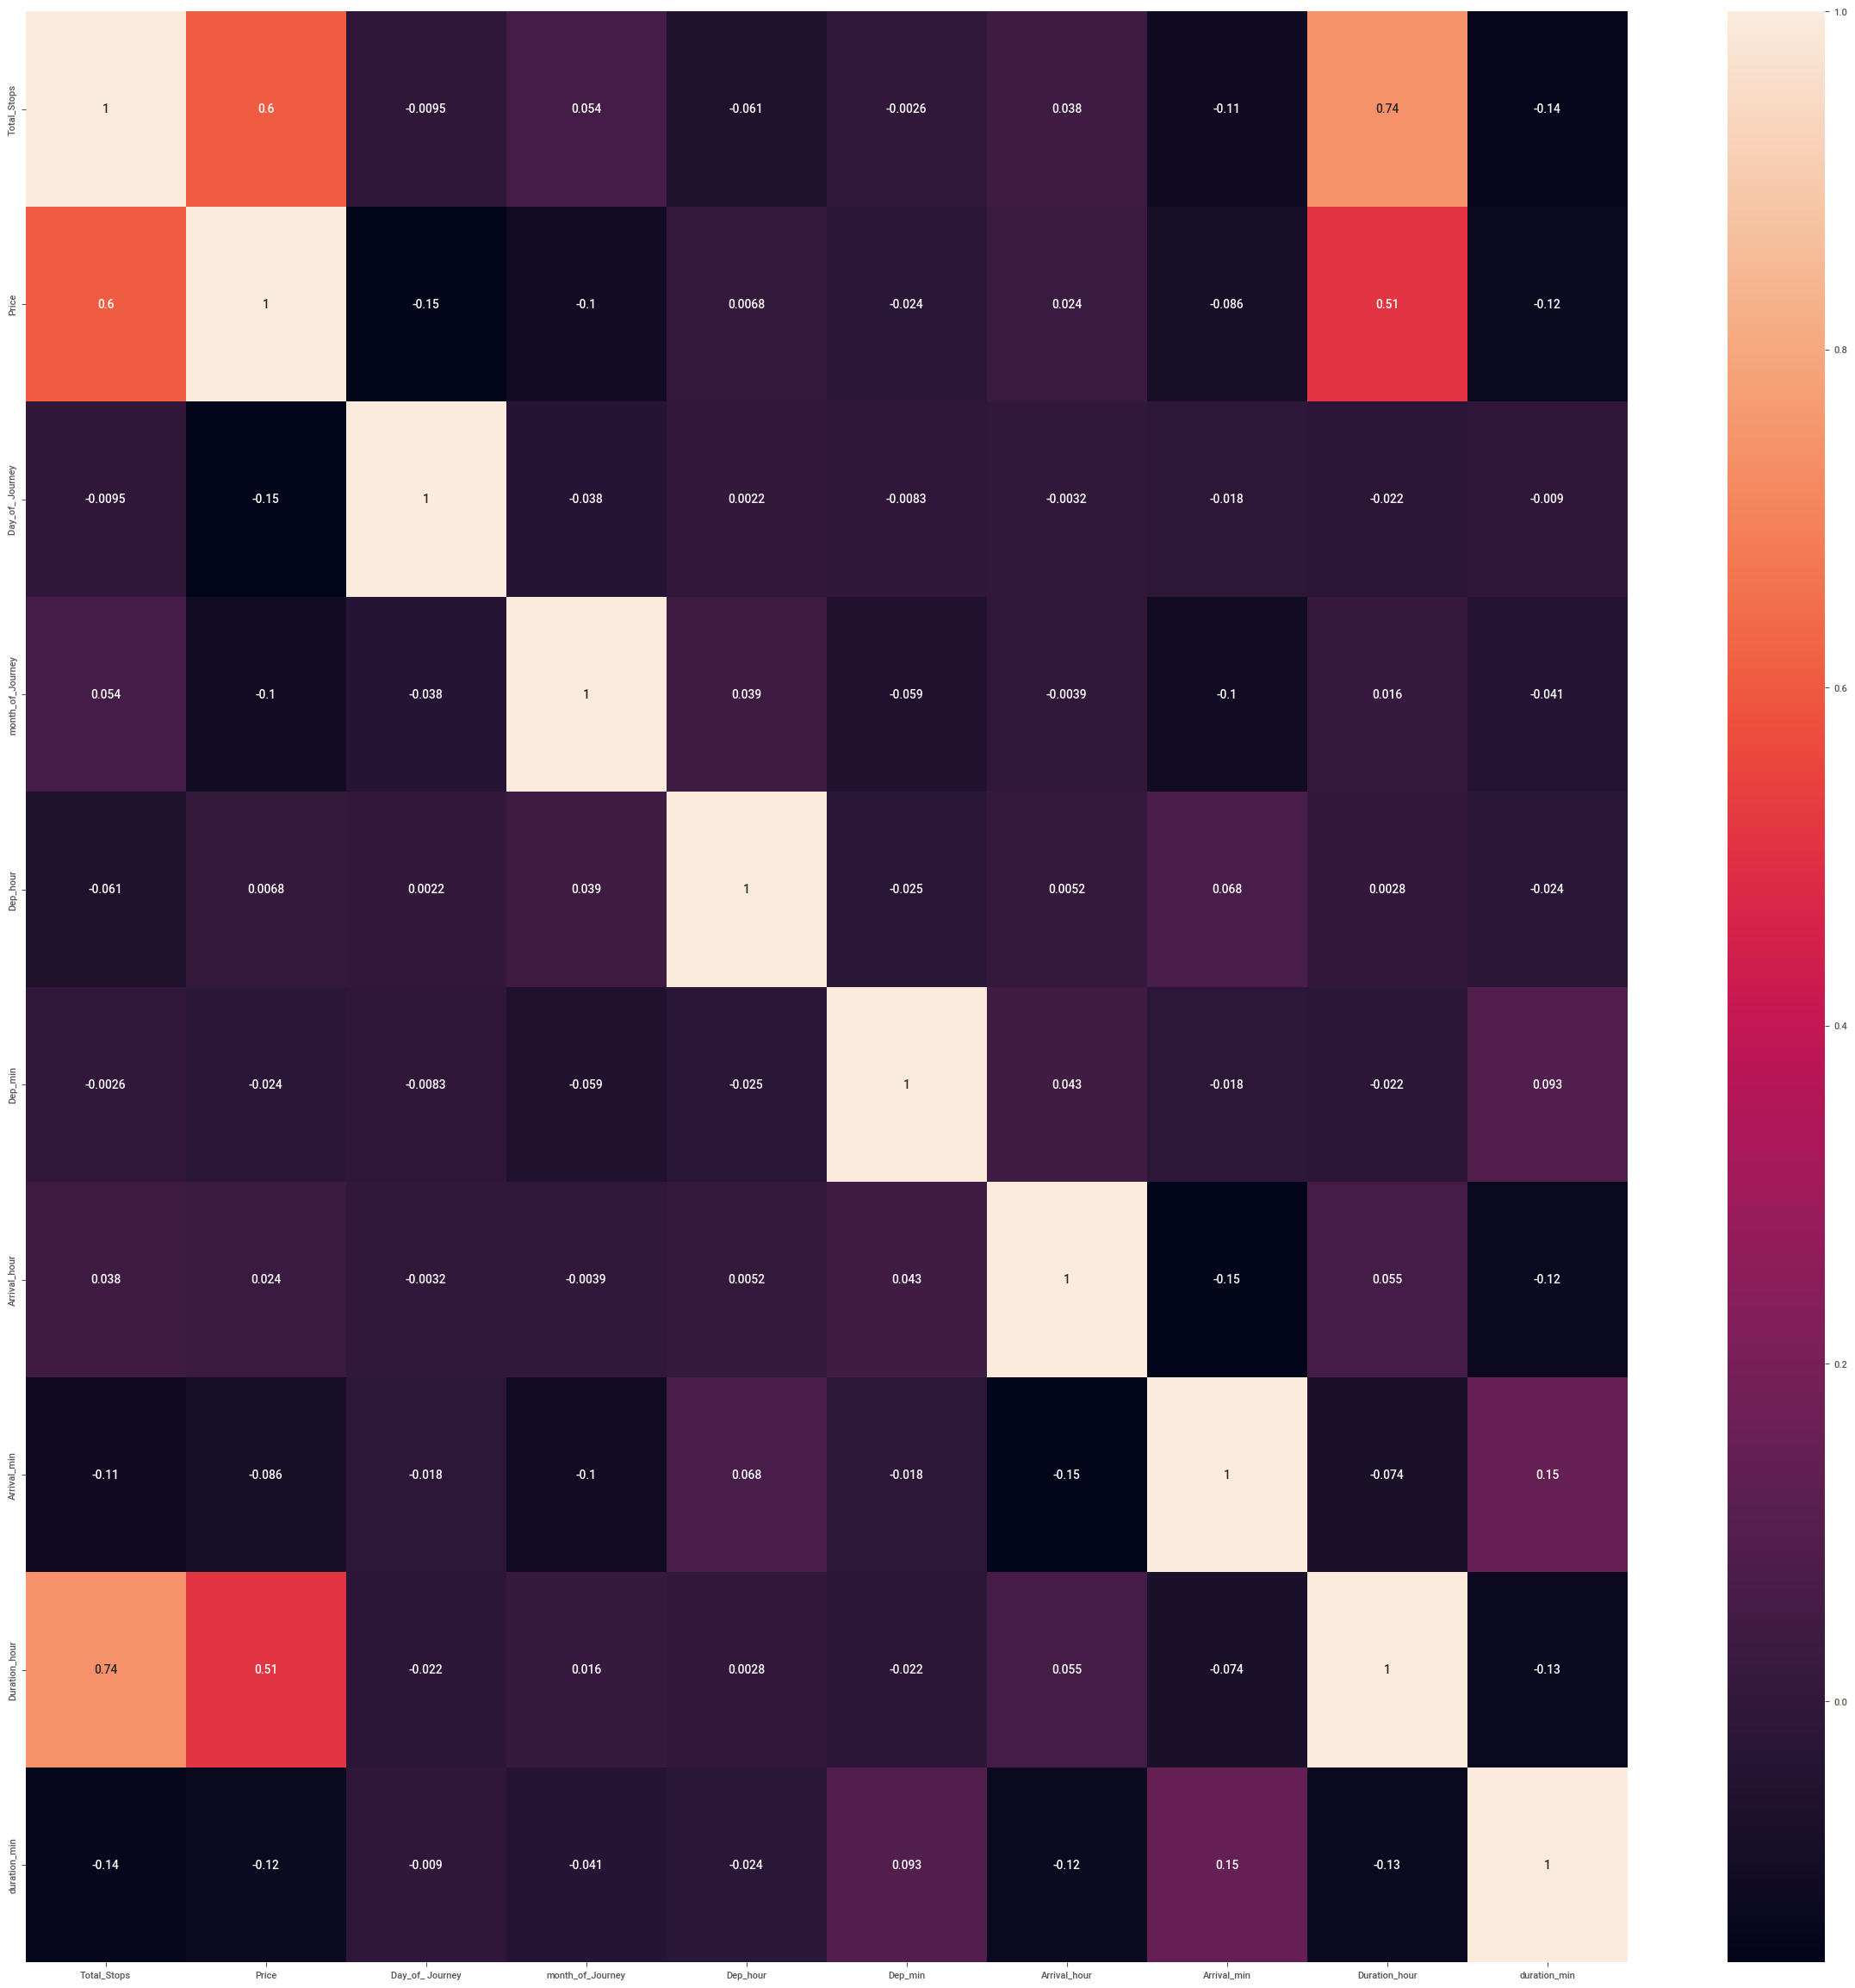

In [45]:
#Checking corelation
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [46]:
data.columns

Index(['Total_Stops', 'Price', 'Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [47]:
X = data.loc[:, ['Total_Stops', 'Day_of_ Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]
X.head()

,Total_Stops,Day_of_ Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,duration_min,Airline_Air India,...,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#X= data.iloc[:,2:]
y= data.iloc[:,1:2]

In [49]:
from sklearn.feature_selection import SelectKBest, chi2

In [50]:
data.shape

(10460, 30)

In [51]:
k = 20
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)
selected_feature_names = X.columns[selector.get_support()]
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['Total_Stops', 'Day_of_ Journey', 'month_of_Journey', 'Dep_min',
       'Duration_hour', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')


### MODEL CREATION

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
y_predict= lr.predict(X_test)

In [54]:
y_test

,Price
7631,14714
7507,11087
2486,12373
1422,4544
2162,12898
...,...
2948,9358
6974,12802
6720,3543
7264,12242


In [55]:
y_predict

array([[11959.69300426],
       [14040.701176  ],
       [11461.32204533],
       ...,
       [ 4637.82685898],
       [11622.17005771],
       [ 9380.91360609]])

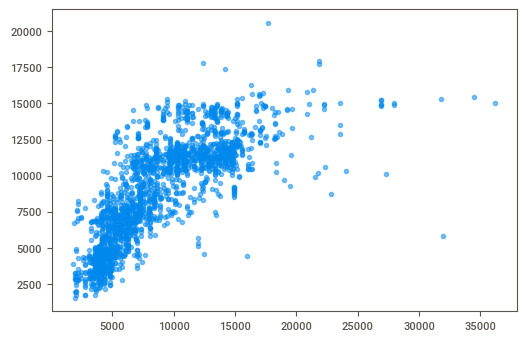

In [56]:
plt.scatter(y_test,y_predict,alpha=0.5)
plt.show()

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [58]:
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print('r2: ',r2)
print('mse: ',mse)
print('mae: ',mae)

r2:  0.5987141445834281
mse:  7910259.080250596
mae:  1972.9788484478927


In [64]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf_reg = RandomForestRegressor()
rf_regressor = RandomForestRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_rf_model = grid_search.best_estimator_
test_predictions = best_rf_model.predict(X_test)
#rf_reg.fit(X_train, y_train)
#y_predict1= rf_reg.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [60]:
y_predict1

array([12429.907     , 12624.34      , 12326.036     , ...,
        3547.329     ,  7721.61333333, 12651.        ])

In [61]:
r2 = r2_score(y_test, y_predict1)
mse = mean_squared_error(y_test, y_predict1)
mae = mean_absolute_error(y_test, y_predict1)
print('r2: ',r2)
print('mse: ',mse)
print('mae: ',mae)

r2:  0.8014935384898411
mse:  3913014.920546098
mae:  1213.120365052809
